In [27]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score,confusion_matrix

In [5]:
df_drug=pd.read_csv('DTA/UniqueDrug_CBF_Train.csv')
df_pro=pd.read_csv("DTA/UniqueProt_PBF_Train.csv")
df_inter=pd.read_csv("DTA/InteractionsMapping_Train (2).csv")
df_drug_test=pd.read_csv('DTA/UniqueDrug_CBF_Test.csv')
df_pro_test=pd.read_csv("DTA/UniqueProt_PBF_Test.csv")
df_inter_test=pd.read_csv("DTA/InteractionsMapping_Test (2).csv")

In [6]:
for i in range(768):
    df_drug_test=df_drug_test.rename(columns={str(i):"CBF"+str((i+1))})
df_drug_test.head()

,Drug_ID,SMILES,CBF1,CBF2,CBF3,CBF4,CBF5,CBF6,CBF7,CBF8,...,CBF759,CBF760,CBF761,CBF762,CBF763,CBF764,CBF765,CBF766,CBF767,CBF768
0,ZINC16051658,CC1=NN=C(O1)C2C(C(C(C(O2)CO)O)O)O,0.637852,0.025078,-0.137181,0.220558,0.985396,-0.497337,-0.323126,0.108800,...,0.113765,0.303574,0.383457,-0.047252,-0.429677,0.569537,-0.275597,-0.370870,0.060566,0.977041
1,DB00683,CC1=NC=C2N1C3=C(C=C(C=C3)Cl)C(=NC2)C4=CC=CC=C4F,0.511134,0.610606,0.014891,-0.301693,1.006940,-0.066792,-0.333556,-0.011036,...,0.010872,0.307153,-0.626864,-0.053657,-0.850919,1.168610,-0.034645,-0.211338,-0.247332,0.665498
2,DB00491,C1C(C(C(C(N1CCO)CO)O)O)O,1.009394,-0.483389,0.251511,0.248934,0.956376,-0.310975,-0.287940,0.057785,...,0.383068,0.624767,0.370716,0.472160,-0.241153,0.216597,-0.484063,-0.499242,0.252377,0.608097
3,ARA,C1C(C(C(C(O1)O)O)O)O,0.738805,-0.497518,-0.214917,0.252138,1.002670,-0.425593,-0.379717,0.063613,...,0.531138,0.861370,0.393844,0.111346,0.050331,0.533231,-0.227467,-0.513811,0.507615,0.945831
4,DB00430,CC1=CC(=O)C(=CN1)C(=O)NC(C2=CC=C(C=C2)O)C(=O)N...,0.432591,-0.156011,-0.739867,0.043201,0.614482,-0.497177,-0.644078,-0.063058,...,-0.099798,0.148621,-0.086503,-0.565915,-0.574261,0.783125,-0.110612,-0.025541,-0.386042,0.759858


In [7]:
merge_df=df_inter.merge(df_drug, on='Drug_ID' , how='inner')
merge_df=merge_df.merge(df_pro,on='P_ID', how='inner')
merge_df_test=df_inter_test.merge(df_drug_test, on='Drug_ID' , how='inner')
merge_df_test=merge_df_test.merge(df_pro_test,on='P_ID', how='inner')

In [8]:
merge_df.shape

(16010, 1797)

In [9]:
merge_df.head(100)

,P_ID,Drug_ID,Labels,SMILES,CBF1,CBF2,CBF3,CBF4,CBF5,CBF6,...,PBF1015,PBF1016,PBF1017,PBF1018,PBF1019,PBF1020,PBF1021,PBF1022,PBF1023,PBF1024
0,Q8TBG4,D00332,1,C1CCC(CC1)(CC(=O)O)CN,0.037544,-0.099144,0.531602,-1.092002,0.138534,-1.023876,...,-0.062044,0.026981,0.072355,-0.028478,-0.042176,-0.032984,-0.055388,-0.068559,-0.001095,-0.016142
1,P54284,D00332,1,C1CCC(CC1)(CC(=O)O)CN,0.037544,-0.099144,0.531602,-1.092002,0.138534,-1.023876,...,-0.003452,-0.046586,0.067139,-0.026609,-0.057467,0.004535,-0.075994,-0.026111,-0.038772,-0.043060
2,P54284,D00437,1,CC1=C(C(C(=C(N1)C)C(=O)OC)C2=CC=CC=C2[N+](=O)[...,0.218090,0.224981,-0.091393,0.174591,0.517229,-0.395668,...,-0.003452,-0.046586,0.067139,-0.026609,-0.057467,0.004535,-0.075994,-0.026111,-0.038772,-0.043060
3,P54284,D02356,1,CC(C)C(CCCN(C)CCC1=CC(=C(C=C1)OC)OC)(C#N)C2=CC...,0.712332,0.123390,0.143302,-0.155832,0.807934,-0.323886,...,-0.003452,-0.046586,0.067139,-0.026609,-0.057467,0.004535,-0.075994,-0.026111,-0.038772,-0.043060
4,P54284,D00560,1,C1CN(CCC1N2C3=CC=CC=C3NC2=O)CCCC(C4=CC=C(C=C4)...,0.470674,0.087535,-0.046992,-0.344518,0.889780,-0.013317,...,-0.003452,-0.046586,0.067139,-0.026609,-0.057467,0.004535,-0.075994,-0.026111,-0.038772,-0.043060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,O15382,D00332,1,C1CCC(CC1)(CC(=O)O)CN,0.037544,-0.099144,0.531602,-1.092002,0.138534,-1.023876,...,-0.027437,-0.011167,0.005468,-0.024377,-0.021546,-0.018221,-0.056238,-0.028174,-0.012972,-0.010167
96,O15382,D00065,1,CCC(C)C(C(=O)O)N,0.509761,-0.064930,0.182271,-0.517200,0.844497,-0.679391,...,-0.027437,-0.011167,0.005468,-0.024377,-0.021546,-0.018221,-0.056238,-0.028174,-0.012972,-0.010167
97,O15382,GBN,0,C1CCC(CC1)(CC(=O)O)CN,0.037544,-0.099144,0.531602,-1.092002,0.138534,-1.023876,...,-0.027437,-0.011167,0.005468,-0.024377,-0.021546,-0.018221,-0.056238,-0.028174,-0.012972,-0.010167
98,P54687,D00332,1,C1CCC(CC1)(CC(=O)O)CN,0.037544,-0.099144,0.531602,-1.092002,0.138534,-1.023876,...,-0.080036,-0.010009,0.080573,-0.069651,-0.000526,-0.065119,-0.044475,-0.082696,-0.057049,-0.014230


In [10]:
df_inter.columns

Index(['P_ID', 'Drug_ID', 'Labels'], dtype='object')

In [11]:
df_drug.columns

Index(['Drug_ID', 'SMILES', 'CBF1', 'CBF2', 'CBF3', 'CBF4', 'CBF5', 'CBF6',
       'CBF7', 'CBF8',
       ...
       'CBF759', 'CBF760', 'CBF761', 'CBF762', 'CBF763', 'CBF764', 'CBF765',
       'CBF766', 'CBF767', 'CBF768'],
      dtype='object', length=770)

In [12]:
df_pro.columns

Index(['P_ID', 'Sequence', 'PBF1', 'PBF2', 'PBF3', 'PBF4', 'PBF5', 'PBF6',
       'PBF7', 'PBF8',
       ...
       'PBF1015', 'PBF1016', 'PBF1017', 'PBF1018', 'PBF1019', 'PBF1020',
       'PBF1021', 'PBF1022', 'PBF1023', 'PBF1024'],
      dtype='object', length=1026)

In [13]:
X = merge_df.drop(columns=['Labels', 'P_ID', 'Drug_ID','SMILES','Sequence'])
y=merge_df['Labels']
X_test = merge_df_test.drop(columns=['Labels', 'P_ID', 'Drug_ID','SMILES','Sequence'])
y_test=merge_df_test['Labels']

In [14]:
merge_df_test.columns

Index(['P_ID', 'Drug_ID', 'Labels', 'SMILES', 'CBF1', 'CBF2', 'CBF3', 'CBF4',
       'CBF5', 'CBF6',
       ...
       'PBF1015', 'PBF1016', 'PBF1017', 'PBF1018', 'PBF1019', 'PBF1020',
       'PBF1021', 'PBF1022', 'PBF1023', 'PBF1024'],
      dtype='object', length=1797)

In [15]:
merge_df.columns

Index(['P_ID', 'Drug_ID', 'Labels', 'SMILES', 'CBF1', 'CBF2', 'CBF3', 'CBF4',
       'CBF5', 'CBF6',
       ...
       'PBF1015', 'PBF1016', 'PBF1017', 'PBF1018', 'PBF1019', 'PBF1020',
       'PBF1021', 'PBF1022', 'PBF1023', 'PBF1024'],
      dtype='object', length=1797)

In [16]:
clf=tree.DecisionTreeClassifier(random_state=42,max_depth=20,min_samples_leaf=10,max_features=1750,min_samples_split=20)

In [17]:
clf.fit(X,y)

DecisionTreeClassifier(max_depth=20, max_features=1750, min_samples_leaf=10,
                       min_samples_split=20, random_state=42)

In [18]:
y_pred_train = clf.predict(X)
accuracy_train = accuracy_score(y, y_pred_train)
print("Accuracy on training data:", accuracy_train)

Accuracy on training data: 0.9765146783260462


In [30]:
y_predict = clf.predict(X_test)
accuracy_test = accuracy_score(y_test,y_predict )
cm= confusion_matrix(y_test, y_predict)
print(cm)
precision = precision_score(y_test, y_predict )
recall = recall_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)
accuracy = accuracy_score(y_test, y_predict)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Accuracy:", accuracy)


[[4791  123]
 [ 442 2570]]
Precision: 0.9543260304493131
Recall: 0.853253652058433
F1-score: 0.9009640666082385
Accuracy: 0.9287156194801918


[Text(0.4420609287709497, 0.9761904761904762, 'x[1138] <= 0.009\ngini = 0.463\nsamples = 16010\nvalue = [10171, 5839]'),
 Text(0.17549755586592178, 0.9285714285714286, 'x[843] <= 0.052\ngini = 0.309\nsamples = 9106\nvalue = [7369, 1737]'),
 Text(0.08004539106145252, 0.8809523809523809, 'x[1693] <= 0.04\ngini = 0.201\nsamples = 7604\nvalue = [6740, 864]'),
 Text(0.05336359404096834, 0.8333333333333334, 'x[632] <= -0.215\ngini = 0.165\nsamples = 7404\nvalue = [6732, 672]'),
 Text(0.0223463687150838, 0.7857142857142857, 'x[1443] <= 0.01\ngini = 0.108\nsamples = 87\nvalue = [5, 82]'),
 Text(0.0148975791433892, 0.7380952380952381, 'x[477] <= -0.568\ngini = 0.026\nsamples = 77\nvalue = [1, 76]'),
 Text(0.0074487895716946, 0.6904761904761905, 'gini = 0.0\nsamples = 67\nvalue = [0, 67]'),
 Text(0.0223463687150838, 0.6904761904761905, 'gini = 0.18\nsamples = 10\nvalue = [1, 9]'),
 Text(0.0297951582867784, 0.7380952380952381, 'gini = 0.48\nsamples = 10\nvalue = [4, 6]'),
 Text(0.0843808193668528

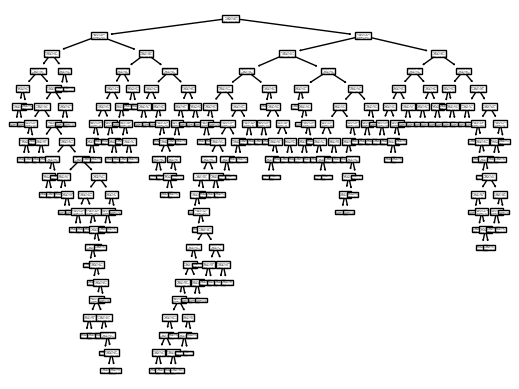

In [20]:
tree.plot_tree(clf)

In [21]:
tree_depth = clf.tree_.max_depth
tree_depth

20

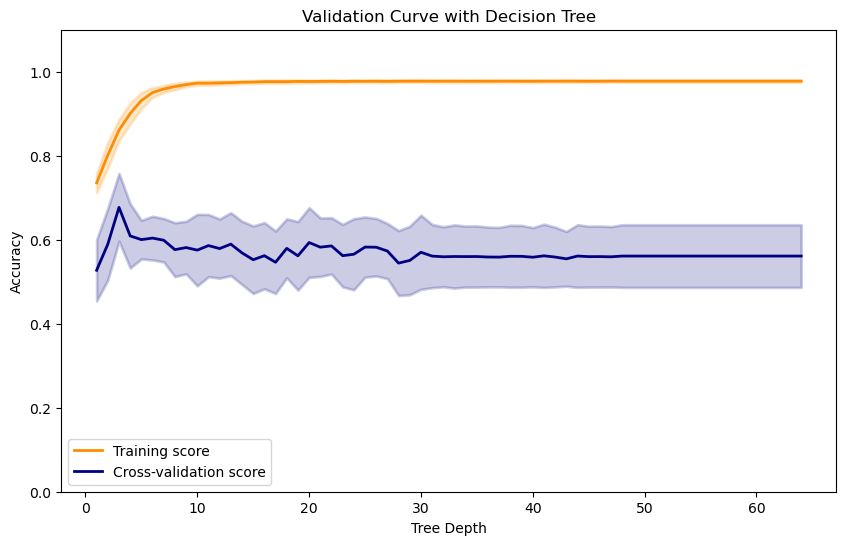

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import validation_curve

# Define a range of depths to explore
param_range = np.arange(1, 65)

# Create a decision tree classifier

# Compute validation curve for the decision tree classifier
train_scores, valid_scores = validation_curve(
    clf, X, y, param_name="max_depth", param_range=param_range,
    cv=5, scoring="accuracy", n_jobs=-1)

# Calculate mean and standard deviation of training and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

# Plot validation curve
plt.figure(figsize=(10, 6))
plt.title("Validation Curve with Decision Tree")
plt.xlabel("Tree Depth")
plt.ylabel("Accuracy")
plt.ylim(0.0, 1.1)
lw = 2
plt.plot(param_range, train_scores_mean, label="Training score", color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.plot(param_range, valid_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()


In [32]:
clf=tree.DecisionTreeClassifier(random_state=42,max_depth=20,min_samples_leaf=10,max_features=1750,min_samples_split=10)
clf.fit(X,y)
y_predict = clf.predict(X_test)
accuracy_test = accuracy_score(y_test,y_predict )
cm= confusion_matrix(y_test, y_predict)
print(cm)
precision = precision_score(y_test, y_predict )
recall = recall_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)
accuracy = accuracy_score(y_test, y_predict)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Accuracy:", accuracy)

[[4791  123]
 [ 442 2570]]
Precision: 0.9543260304493131
Recall: 0.853253652058433
F1-score: 0.9009640666082385
Accuracy: 0.9287156194801918


In [34]:
clf=tree.DecisionTreeClassifier(random_state=42,max_depth=20,min_samples_leaf=10,max_features=1750,min_samples_split=10,min_impurity_decrease=0.00001)
clf.fit(X,y)
y_predict = clf.predict(X_test)
accuracy_test = accuracy_score(y_test,y_predict )
cm= confusion_matrix(y_test, y_predict)
print(cm)
precision = precision_score(y_test, y_predict )
recall = recall_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)
accuracy = accuracy_score(y_test, y_predict)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Accuracy:", accuracy)

[[4791  123]
 [ 442 2570]]
Precision: 0.9543260304493131
Recall: 0.853253652058433
F1-score: 0.9009640666082385
Accuracy: 0.9287156194801918


In [37]:
clf=tree.DecisionTreeClassifier(random_state=42,max_depth=20,min_samples_leaf=10,max_features=1700,min_samples_split=10,min_impurity_decrease=0.000052,ccp_alpha=0.00015)
clf.fit(X,y)
y_predict = clf.predict(X_test)
accuracy_test = accuracy_score(y_test,y_predict )
cm= confusion_matrix(y_test, y_predict)
print(cm)
precision = precision_score(y_test, y_predict )
recall = recall_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)
accuracy = accuracy_score(y_test, y_predict)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Accuracy:", accuracy)

[[4786  128]
 [ 495 2517]]
Precision: 0.9516068052930057
Recall: 0.8356573705179283
F1-score: 0.8898709563372812
Accuracy: 0.9213979308604593


In [39]:
clf=tree.DecisionTreeClassifier(random_state=42,max_depth=20,min_samples_leaf=10,max_features=1700,min_samples_split=10,min_impurity_decrease=0.000052)
clf.fit(X,y)
y_predict = clf.predict(X_test)
accuracy_test = accuracy_score(y_test,y_predict )
cm= confusion_matrix(y_test, y_predict)
print(cm)
precision = precision_score(y_test, y_predict )
recall = recall_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)
accuracy = accuracy_score(y_test, y_predict)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Accuracy:", accuracy)

[[4786  128]
 [ 495 2517]]
Precision: 0.9516068052930057
Recall: 0.8356573705179283
F1-score: 0.8898709563372812
Accuracy: 0.9213979308604593


In [40]:
clf=tree.DecisionTreeClassifier(random_state=42,max_depth=20,min_samples_leaf=10,max_features=900,min_samples_split=10,min_impurity_decrease=0.000052)
clf.fit(X,y)
y_predict = clf.predict(X_test)
accuracy_test = accuracy_score(y_test,y_predict )
cm= confusion_matrix(y_test, y_predict)
print(cm)
precision = precision_score(y_test, y_predict )
recall = recall_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)
accuracy = accuracy_score(y_test, y_predict)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Accuracy:", accuracy)

[[4810  104]
 [ 508 2504]]
Precision: 0.9601226993865031
Recall: 0.8313413014608234
F1-score: 0.8911032028469751
Accuracy: 0.9227857683573051


In [41]:
clf=tree.DecisionTreeClassifier(random_state=42,max_depth=20,min_samples_leaf=5,max_features=1200,min_samples_split=5,min_impurity_decrease=0.000052)
clf.fit(X,y)
y_predict = clf.predict(X_test)
accuracy_test = accuracy_score(y_test,y_predict )
cm= confusion_matrix(y_test, y_predict)
print(cm)
precision = precision_score(y_test, y_predict )
recall = recall_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)
accuracy = accuracy_score(y_test, y_predict)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Accuracy:", accuracy)

[[4821   93]
 [ 541 2471]]
Precision: 0.9637285491419657
Recall: 0.8203851261620186
F1-score: 0.8862984218077475
Accuracy: 0.9200100933636134


In [43]:
clf=tree.DecisionTreeClassifier(random_state=42,max_depth=20,min_samples_leaf=10,max_features=1750,min_samples_split=10,min_impurity_decrease=0.00001)
clf.fit(X,y)
y_predict = clf.predict(X_test)
accuracy_test = accuracy_score(y_test,y_predict )
cm= confusion_matrix(y_test, y_predict)
print(cm)
precision = precision_score(y_test, y_predict )
recall = recall_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)
accuracy = accuracy_score(y_test, y_predict)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Accuracy:", accuracy)

[[4791  123]
 [ 442 2570]]
Precision: 0.9543260304493131
Recall: 0.853253652058433
F1-score: 0.9009640666082385
Accuracy: 0.9287156194801918


In [44]:
clf=tree.DecisionTreeClassifier(random_state=42,max_depth=20,min_samples_leaf=10,max_features=1750,min_samples_split=10,min_impurity_decrease=0.01)
clf.fit(X,y)
y_predict = clf.predict(X_test)
accuracy_test = accuracy_score(y_test,y_predict )
cm= confusion_matrix(y_test, y_predict)
print(cm)
precision = precision_score(y_test, y_predict )
recall = recall_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)
accuracy = accuracy_score(y_test, y_predict)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Accuracy:", accuracy)

[[4632  282]
 [ 975 2037]]
Precision: 0.8783958602846055
Recall: 0.6762948207171314
F1-score: 0.7642093415869443
Accuracy: 0.8414080242240727


In [45]:
clf=tree.DecisionTreeClassifier(random_state=42,max_depth=20,min_samples_leaf=10,max_features=1750,min_samples_split=10,min_impurity_decrease=0.0001)
clf.fit(X,y)
y_predict = clf.predict(X_test)
accuracy_test = accuracy_score(y_test,y_predict )
cm= confusion_matrix(y_test, y_predict)
print(cm)
precision = precision_score(y_test, y_predict )
recall = recall_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)
accuracy = accuracy_score(y_test, y_predict)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Accuracy:", accuracy)

[[4781  133]
 [ 463 2549]]
Precision: 0.9504101416853095
Recall: 0.8462815405046481
F1-score: 0.8953284158763611
Accuracy: 0.9248044410799899


In [46]:
clf=tree.DecisionTreeClassifier(random_state=42,max_depth=20,min_samples_leaf=10,max_features=1750,min_samples_split=10,class_weight={0:1,1:1.74})
clf.fit(X,y)
y_predict = clf.predict(X_test)
accuracy_test = accuracy_score(y_test,y_predict )
cm= confusion_matrix(y_test, y_predict)
print(cm)
precision = precision_score(y_test, y_predict )
recall = recall_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)
accuracy = accuracy_score(y_test, y_predict)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Accuracy:", accuracy)

[[4691  223]
 [ 476 2536]]
Precision: 0.9191736136281261
Recall: 0.8419654714475432
F1-score: 0.8788771443424017
Accuracy: 0.9118092354277063


In [47]:
clf=tree.DecisionTreeClassifier(random_state=42,min_samples_leaf=10,max_features=1750,min_samples_split=10,class_weight={0:1,1:1.74})
clf.fit(X,y)
y_predict = clf.predict(X_test)
accuracy_test = accuracy_score(y_test,y_predict )
cm= confusion_matrix(y_test, y_predict)
print(cm)
precision = precision_score(y_test, y_predict )
recall = recall_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)
accuracy = accuracy_score(y_test, y_predict)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Accuracy:", accuracy)

[[4674  240]
 [ 463 2549]]
Precision: 0.9139476514879885
Recall: 0.8462815405046481
F1-score: 0.878813997586623
Accuracy: 0.9113045672470351


In [48]:
clf=tree.DecisionTreeClassifier(random_state=42,min_samples_leaf=10,max_features=1750,min_samples_split=10,class_weight='balanced')
clf.fit(X,y)
y_predict = clf.predict(X_test)
accuracy_test = accuracy_score(y_test,y_predict )
cm= confusion_matrix(y_test, y_predict)
print(cm)
precision = precision_score(y_test, y_predict )
recall = recall_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)
accuracy = accuracy_score(y_test, y_predict)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Accuracy:", accuracy)

[[4706  208]
 [ 475 2537]]
Precision: 0.9242258652094718
Recall: 0.8422974767596282
F1-score: 0.8813618203925656
Accuracy: 0.9138279081503912


In [49]:
clf=tree.DecisionTreeClassifier(random_state=42,max_features=1700,class_weight='balanced')
clf.fit(X,y)
y_predict = clf.predict(X_test)
accuracy_test = accuracy_score(y_test,y_predict )
cm= confusion_matrix(y_test, y_predict)
print(cm)
precision = precision_score(y_test, y_predict )
recall = recall_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)
accuracy = accuracy_score(y_test, y_predict)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Accuracy:", accuracy)

[[4775  139]
 [ 609 2403]]
Precision: 0.9453186467348544
Recall: 0.797808764940239
F1-score: 0.8653222902412675
Accuracy: 0.905627050214484


In [50]:
clf=tree.DecisionTreeClassifier(random_state=42,min_samples_leaf=10,max_features=1750,min_samples_split=5,class_weight='balanced')
clf.fit(X,y)
y_predict = clf.predict(X_test)
accuracy_test = accuracy_score(y_test,y_predict )
cm= confusion_matrix(y_test, y_predict)
print(cm)
precision = precision_score(y_test, y_predict )
recall = recall_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)
accuracy = accuracy_score(y_test, y_predict)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Accuracy:", accuracy)

[[4706  208]
 [ 475 2537]]
Precision: 0.9242258652094718
Recall: 0.8422974767596282
F1-score: 0.8813618203925656
Accuracy: 0.9138279081503912


In [51]:
clf=tree.DecisionTreeClassifier(random_state=42,min_samples_leaf=5,max_features=1750,min_samples_split=5,class_weight='balanced')
clf.fit(X,y)
y_predict = clf.predict(X_test)
accuracy_test = accuracy_score(y_test,y_predict )
cm= confusion_matrix(y_test, y_predict)
print(cm)
precision = precision_score(y_test, y_predict )
recall = recall_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)
accuracy = accuracy_score(y_test, y_predict)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Accuracy:", accuracy)

[[4681  233]
 [ 430 2582]]
Precision: 0.9172291296625222
Recall: 0.8572377158034529
F1-score: 0.8862193238373091
Accuracy: 0.9163512490537472


In [52]:
clf=tree.DecisionTreeClassifier(random_state=42,max_features=1750,class_weight='balanced')
clf.fit(X,y)
y_predict = clf.predict(X_test)
accuracy_test = accuracy_score(y_test,y_predict )
cm= confusion_matrix(y_test, y_predict)
print(cm)
precision = precision_score(y_test, y_predict )
recall = recall_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)
accuracy = accuracy_score(y_test, y_predict)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Accuracy:", accuracy)

[[4760  154]
 [ 540 2472]]
Precision: 0.9413556740289414
Recall: 0.8207171314741036
F1-score: 0.8769067045051437
Accuracy: 0.9124400706535453


In [53]:
clf=tree.DecisionTreeClassifier(random_state=42,min_samples_leaf=5,max_features=1500,min_samples_split=5,class_weight='balanced')
clf.fit(X,y)
y_predict = clf.predict(X_test)
accuracy_test = accuracy_score(y_test,y_predict )
cm= confusion_matrix(y_test, y_predict)
print(cm)
precision = precision_score(y_test, y_predict )
recall = recall_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)
accuracy = accuracy_score(y_test, y_predict)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Accuracy:", accuracy)

[[4700  214]
 [ 476 2536]]
Precision: 0.9221818181818182
Recall: 0.8419654714475432
F1-score: 0.8802499132245749
Accuracy: 0.9129447388342165


In [54]:
clf=tree.DecisionTreeClassifier(random_state=42,min_samples_leaf=5,max_features=1500,min_samples_split=5,class_weight='balanced',max_depth=20)
clf.fit(X,y)
y_predict = clf.predict(X_test)
accuracy_test = accuracy_score(y_test,y_predict )
cm= confusion_matrix(y_test, y_predict)
print(cm)
precision = precision_score(y_test, y_predict )
recall = recall_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)
accuracy = accuracy_score(y_test, y_predict)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Accuracy:", accuracy)

[[4695  219]
 [ 478 2534]]
Precision: 0.9204504177261169
Recall: 0.8413014608233732
F1-score: 0.8790980052038161
Accuracy: 0.9120615695180418


In [55]:
clf=tree.DecisionTreeClassifier(random_state=42,min_samples_leaf=5,max_features=1750,min_samples_split=5,class_weight='balanced',max_depth=20)
clf.fit(X,y)
y_predict = clf.predict(X_test)
accuracy_test = accuracy_score(y_test,y_predict )
cm= confusion_matrix(y_test, y_predict)
print(cm)
precision = precision_score(y_test, y_predict )
recall = recall_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)
accuracy = accuracy_score(y_test, y_predict)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Accuracy:", accuracy)

[[4709  205]
 [ 494 2518]]
Precision: 0.9247153874403232
Recall: 0.8359893758300133
F1-score: 0.8781168265039233
Accuracy: 0.9118092354277063


In [56]:
clf=tree.DecisionTreeClassifier(random_state=42,min_samples_leaf=5,max_features=1750,min_samples_split=5,class_weight='balanced',)
clf.fit(X,y)
y_predict = clf.predict(X_test)
accuracy_test = accuracy_score(y_test,y_predict )
cm= confusion_matrix(y_test, y_predict)
print(cm)
precision = precision_score(y_test, y_predict )
recall = recall_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)
accuracy = accuracy_score(y_test, y_predict)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Accuracy:", accuracy)

[[4681  233]
 [ 430 2582]]
Precision: 0.9172291296625222
Recall: 0.8572377158034529
F1-score: 0.8862193238373091
Accuracy: 0.9163512490537472


In [60]:
clf=tree.DecisionTreeClassifier(random_state=42,min_samples_leaf=5,max_features=1750,min_samples_split=5,class_weight='balanced',min_weight_fraction_leaf=0.005)
clf.fit(X,y)
y_predict = clf.predict(X_test)
accuracy_test = accuracy_score(y_test,y_predict )
cm= confusion_matrix(y_test, y_predict)
print(cm)
precision = precision_score(y_test, y_predict )
recall = recall_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)
accuracy = accuracy_score(y_test, y_predict)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Accuracy:", accuracy)

[[4601  313]
 [ 493 2519]]
Precision: 0.8894774011299436
Recall: 0.8363213811420983
F1-score: 0.8620807665982204
Accuracy: 0.8983093615947515


In [63]:
clf=tree.DecisionTreeClassifier(random_state=42,min_samples_leaf=5,max_features=1750,min_samples_split=5,class_weight='balanced',ccp_alpha=0.000052)
clf.fit(X,y)
y_predict = clf.predict(X_test)
accuracy_test = accuracy_score(y_test,y_predict )
cm= confusion_matrix(y_test, y_predict)
print(cm)
precision = precision_score(y_test, y_predict )
recall = recall_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)
accuracy = accuracy_score(y_test, y_predict)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Accuracy:", accuracy)

[[4681  233]
 [ 430 2582]]
Precision: 0.9172291296625222
Recall: 0.8572377158034529
F1-score: 0.8862193238373091
Accuracy: 0.9163512490537472


In [64]:
clf=tree.DecisionTreeClassifier(random_state=42,min_samples_leaf=5,max_features=1750,min_samples_split=5,class_weight={0:1,1:2},ccp_alpha=0.000052)
clf.fit(X,y)
y_predict = clf.predict(X_test)
accuracy_test = accuracy_score(y_test,y_predict )
cm= confusion_matrix(y_test, y_predict)
print(cm)
precision = precision_score(y_test, y_predict )
recall = recall_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)
accuracy = accuracy_score(y_test, y_predict)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Accuracy:", accuracy)

[[4724  190]
 [ 494 2518]]
Precision: 0.9298375184638109
Recall: 0.8359893758300133
F1-score: 0.8804195804195803
Accuracy: 0.9137017411052233
